## weekdays_datasets

In [2]:
import pandas as pd
import numpy as np
import sys
import os

# Allows importing modules defined inside the project directory:
path = os.path.abspath(os.path.curdir)
while len(path) > 1 and not path.endswith('Mestrado'):
    path = os.path.abspath(os.path.join(path, '..'))
if path not in sys.path:
    sys.path.append(path)
sys.path.append('./MultiRocket')
print(sys.path)


['/Users/carolina/Desktop/Mestrado', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages', './MultiRocket']


In [3]:
df = pd.read_csv('weekdays_datasets/df_timeseries.csv')

Colunas CSV em weekdays_dataset.zip

h00-h23: Faixa de popularidade (0-1) entre meia-noite e onze da noite

country: 0 - Brasil, 1 - Estados Unidos

city: 0 - Curitiba, 1 - Rio de Janeiro, 2 - São Paulo, 0 - Chicago, 1 - New York, 2 - San Francisco

category: 0 - bakeries, 1 - bars, 2 - coffee, 3 - dance clubs, 4 - restaurants

In [4]:
df

,id,h00,h01,h02,h03,h04,h05,h06,h07,h08,...,h17,h18,h19,h20,h21,h22,h23,country,city,category
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.347754,0.522437,0.940441,0.823425,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.320058,0.212006,0.212006,0.212006,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.805263,0.483633,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080787,0.303251,0.519247,...,0.986970,0.917125,0.562874,0.378466,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.060529,0.172893,...,0.878997,0.994609,0.901742,0.667729,0.387283,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,12699,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.430487,0.759348,0.991525,0.870099,0.588773,0.000000,0.000000,1.0,4.0,4.0
12700,12700,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.192508,0.564814,0.973335,0.966669,0.548366,0.000000,0.000000,1.0,4.0,4.0
12701,12701,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.571624,0.201609,0.144007,0.334674,0.000000,0.000000,0.000000,1.0,4.0,4.0
12702,12702,0.474252,0.256943,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.341396,0.630530,0.810973,0.971333,1.000000,0.897192,0.743494,1.0,4.0,4.0


In [5]:
from sklearn.model_selection import train_test_split

def extract_x_y(df, country):
    filtered_df = df[(df['country'] == country)]
    df_x = filtered_df.drop(columns=['id','country', 'city', 'category'])
    return np.array(df_x),np.array(filtered_df['category'])

X, y = extract_x_y(df,0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
print(X_train.shape, X_test.shape)

(3364, 24) (1122, 24)


In [6]:
X_1, y_1 = extract_x_y(df,1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1)
print(X_train_1.shape, X_test_1.shape)

(6163, 24) (2055, 24)


## HIVECOTEV2

In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [8]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [9]:
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.sklearn import RotationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

hc2_classifier = HIVECOTEV2(
    stc_params={
        "estimator": RotationForest(n_estimators=3),
        "n_shapelet_samples": 100,
        "max_shapelets": 10,
        "batch_size": 20,
    },
    drcif_params={"n_estimators": 2, "n_intervals": 2, "att_subsample_size": 2},
    arsenal_params={"num_kernels": 50, "n_estimators": 3},
    tde_params={
        "n_parameter_samples": 10,
        "max_ensemble_size": 3,
        "randomly_selected_params": 5,
    },
)
# Country 0
hc2_classifier.fit(X_train, y_train)
print("predicting...")
hc2_pred = hc2_classifier.predict(X_test)
print("results...")
print(accuracy_score(y_test, hc2_pred))
print(f1_score(y_test, hc2_pred, average='weighted'))

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


predicting...


/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


results...
0.6987522281639929
0.6930103929058156


In [10]:
# Country 1
hc2_classifier.fit(X_train_1, y_train_1)
print("predicting...")
hc2_pred_1 = hc2_classifier.predict(X_test_1)
print("results...")
print(accuracy_score(y_test_1, hc2_pred_1))
print(f1_score(y_test_1, hc2_pred_1, average='weighted'))

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


predicting...


/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


results...
0.6593673965936739
0.65281082091715


In [11]:
print(precision_score(y_test, hc2_pred, average='weighted'))
print(recall_score(y_test, hc2_pred, average='weighted'))

0.6931440269616141
0.6987522281639929


In [12]:
print(precision_score(y_test_1, hc2_pred_1, average='weighted'))
print(recall_score(y_test_1, hc2_pred_1, average='weighted'))

0.6646755443816015
0.6593673965936739


validating signatures

In [51]:
hc2_pred_sig = hc2_classifier.predict(Xs)
print("validating signatures...")
accuracy_score(ys, hc2_pred_sig)

validating signatures...


0.4

## Hydra

In [13]:
import torch

X_train_tensor = torch.tensor(np.expand_dims(X_train, axis=1), dtype=torch.float32)
X_test_tensor = torch.tensor(np.expand_dims(X_test, axis=1), dtype=torch.float32)
X_train_tensor.shape

torch.Size([3364, 1, 24])

In [14]:
X_train_tensor_1 = torch.tensor(np.expand_dims(X_train_1, axis=1), dtype=torch.float32)
X_test_tensor_1 = torch.tensor(np.expand_dims(X_test_1, axis=1), dtype=torch.float32)
X_train_tensor_1.shape

torch.Size([6163, 1, 24])

In [15]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

In [16]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

transform = Hydra(X_train.shape[-1])

X_training_transform = transform(X_train_tensor)
X_test_transform = transform(X_test_tensor)

scaler = SparseScaler()

X_training_transform = scaler.fit_transform(X_training_transform)
X_test_transform = scaler.transform(X_test_transform)

hydra_classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
hydra_classifier.fit(X_training_transform, y_train)

hydra_pred = hydra_classifier.predict(X_test_transform)
print(accuracy_score(y_test, hydra_pred))
print(f1_score(y_test, hydra_pred, average='weighted'))

0.713903743315508
0.7071473383461842


In [ ]:
# Country 0
print(precision_score(y_test, hydra_pred, average='weighted'))
print(recall_score(y_test, hydra_pred, average='weighted'))

0.7094495884761344
0.713903743315508


### Hydra Country 1

In [17]:
transform_1 = Hydra(X_train_1.shape[-1])

X_training_transform_1 = transform_1(X_train_tensor_1)
X_test_transform_1 = transform_1(X_test_tensor_1)

scaler = SparseScaler()

X_training_transform_1 = scaler.fit_transform(X_training_transform_1)
X_test_transform_1 = scaler.transform(X_test_transform_1)

hydra_classifier_1 = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
hydra_classifier_1.fit(X_training_transform_1, y_train_1)

hydra_pred_1 = hydra_classifier_1.predict(X_test_transform_1)
print(accuracy_score(y_test_1, hydra_pred_1))
print(f1_score(y_test_1, hydra_pred_1, average='weighted'))

0.6778588807785888
0.6734186103318354


In [19]:
# Country 1
print(precision_score(y_test_1, hydra_pred_1, average='weighted'))
print(recall_score(y_test_1, hydra_pred_1, average='weighted'))

0.6777876311283864
0.6778588807785888


## Mutirocket

In [20]:
from multirocket.multirocket import MultiRocket
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# returns ntc format, remove the last dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

mrocket_classifier = MultiRocket(
    num_features=50000,
    classifier="logistic",
    verbose=2,
)
yhat_train = mrocket_classifier.fit(
    X_train, y_train,
    predict_on_train=False
)
mrocket_pred = mrocket_classifier.predict(X_test)
print(accuracy_score(y_test, mrocket_pred))
print(f1_score(y_test, mrocket_pred, average='weighted'))

[MultiRocket] Creating MultiRocket with 6250 kernels
[MultiRocket] Training with training set of (3364, 24)
[MultiRocket] Kernels applied!, took 6.0953057240003545s
[MultiRocket] Transformed Shape (3364, 49728)
[MultiRocket] Training


epoch: 31:  46%|████▌     | 6/13 [00:00<00:00, 23.21it/s]



<Stopped at Epoch 32>
[MultiRocket] Training done!, took 28.772s
[MultiRocket] Predicting
Kernels applied!, took 0.428s. Transformed shape: (1122, 49728).
[MultiRocket] Predicting completed, took 0.663s
0.6871657754010695
0.6874253431487042


In [21]:
print(precision_score(y_test, mrocket_pred, average='weighted'))
print(recall_score(y_test, mrocket_pred, average='weighted'))

0.6972193622670879
0.6871657754010695


### Multirocket Country 1

In [22]:
from multirocket.multirocket import MultiRocket
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_1 = encoder.fit_transform(y_train_1)
y_test_1 = encoder.transform(y_test_1)

# returns ntc format, remove the last dimension
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1]))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1]))

nb_classes = len(np.unique(np.concatenate((y_train_1, y_test_1), axis=0)))

mrocket_classifier = MultiRocket(
    num_features=50000,
    classifier="logistic",
    verbose=2,
)
yhat_train = mrocket_classifier.fit(
    X_train_1, y_train_1,
    predict_on_train=False
)
mrocket_pred_1 = mrocket_classifier.predict(X_test_1)
print(accuracy_score(y_test_1, mrocket_pred_1))
print(f1_score(y_test_1, mrocket_pred_1, average='weighted'))

[MultiRocket] Creating MultiRocket with 6250 kernels
[MultiRocket] Training with training set of (6163, 24)


[MultiRocket] Kernels applied!, took 11.901395795999633s
[MultiRocket] Transformed Shape (6163, 49728)
[MultiRocket] Training


epoch: 32:  71%|███████   | 17/24 [00:00<00:00, 29.98it/s]



<Stopped at Epoch 33>
[MultiRocket] Training done!, took 59.217s
[MultiRocket] Predicting
Kernels applied!, took 0.839s. Transformed shape: (2055, 49728).
[MultiRocket] Predicting completed, took 1.001s
0.6822384428223844
0.6792269985446241


In [23]:
print(precision_score(y_test_1, mrocket_pred_1, average='weighted'))
print(recall_score(y_test_1, mrocket_pred_1, average='weighted'))

0.6807016817749802
0.6822384428223844


# Distance based: classification is based on some time series specific distance measure between series

Distance based classifiers use a distance function to measure the similarity between time series.

## Rank 1 Proximity Forest

In [ ]:
# Rank 1 Proximity Forest
from sktime.classification.distance_based import ProximityForest

clf_pf = ProximityForest(
    n_estimators=2, max_depth=2, n_stump_evaluations=1
) 
clf_pf.fit(X_train, y_train) 
y_pred_pf = clf_pf.predict(X_test) 

In [ ]:
print(accuracy_score(y_test, y_pred_pf))
print(f1_score(y_test, y_pred_pf, average='weighted'))
print(precision_score(y_test, y_pred_pf, average='weighted'))
print(recall_score(y_test, y_pred_pf, average='weighted'))

## Rank 2 Elastic Ensemble

In [24]:
from aeon.classification.distance_based import ElasticEnsemble

clf_ee = ElasticEnsemble(
    proportion_of_param_options=0.1,
    proportion_train_for_test=0.1,
    distance_measures = ["dtw","ddtw"],
    majority_vote=True,
)
clf_ee.fit(X_train, y_train)

y_pred_ee = clf_ee.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred_ee)

0.6363636363636364

In [26]:
f1_score(y_test, y_pred_ee, average='weighted')

0.6389061171703156

In [27]:
precision_score(y_test, y_pred_ee, average='weighted')

0.6596579197895888

In [28]:
recall_score(y_test, y_pred_ee, average='weighted')

0.6363636363636364

# Feature based: global features are extracted and passed to a standard clas- sifier in a simple pipeline

## Rank 1 FreshPrince

In [29]:
from sktime.classification.feature_based import FreshPRINCE
#from sktime._contrib.vector_classifiers._rotation_forest import RotationForest

clf_freshPRINCE = FreshPRINCE(
    default_fc_parameters="minimal",
    n_estimators=5,
)
clf_freshPRINCE.fit(X_train, y_train)
FreshPRINCE(...)
y_pred_freshPRINCE = clf_freshPRINCE.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred_freshPRINCE)

0.5944741532976827

In [31]:
f1_score(y_test, y_pred_freshPRINCE, average='weighted')

0.5940161318332224

In [32]:
precision_score(y_test, y_pred_freshPRINCE, average='weighted')

0.5957011412930234

In [33]:
recall_score(y_test, y_pred_freshPRINCE, average='weighted')

0.5944741532976827

## genetic algorithms

In [34]:
from scipy.optimize import minimize

N = 1
categ = 0
# X_ini = np.random.rand(N*24)
X_cat, y_cat = extract_x_y(df,0,0,categ)
X_avg = X_cat.mean(axis=0)
X_avg = np.pad(X_avg, ((2,2)), mode='constant', constant_values=0)

def fitness(X):
    X_np = np.array(X)
    X_sig = transform(torch.tensor(np.expand_dims(
        X_np.reshape(N,24),
        axis=1
    ), dtype=torch.float32))

    violated_constraints = np.maximum(0, X_np - 1.0) + np.maximum(0, 0.0 - X_np)
    penalty = sum(violated_constraints)
    distance = np.mean([np.min([np.linalg.norm(X_avg[x:x+24] - row) for x in range(5)]) for row in X_np.reshape(N, 24)])

    y = hydra_classifier.predict(X_sig)
    
    return accuracy_score([categ]*N, y), - penalty, - distance

# return accuracy_score([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5], y)
# return accuracy_score([0,1,2,3,4,5], y)
# res = minimize(fitness, X_ini, method = 'Nelder-Mead', options={'maxiter':100, 'disp':True,'fatol':0})
# res

TypeError: extract_x_y() takes 2 positional arguments but 4 were given

In [ ]:
# fitness(X_ini)

(0.0, -0.0, 130.93682658688874)

In [ ]:
import numpy as np
import pygad

num_generations = 10000
num_parents_mating = 10
sol_per_pop = 50
num_genes = N*24

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=lambda ga, sol, i: fitness(sol),
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       random_mutation_min_val=-0.1,
                       random_mutation_max_val=0.1)

ga_instance.run()

print("Best solution:", ga_instance.best_solution())


/Users/carolina/anaconda3/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Best solution: (array([0.00263309, 0.01618933, 0.01411421, 0.01103476, 0.00979842,
       0.0100045 , 0.01517333, 0.01234704, 0.19178997, 0.39106192,
       0.48274228, 0.46821296, 0.43727749, 0.4649771 , 0.47091612,
       0.47754438, 0.5420403 , 0.681255  , 0.75840609, 0.67349862,
       0.45992342, 0.25251185, 0.21886793, 0.06653822]), array([ 0.        , -0.        , -0.01144639]), 0)


In [ ]:
ga_instance.best_solution()

(array([0.00263309, 0.01618933, 0.01411421, 0.04375813, 0.00979842,
        0.0100045 , 0.01517333, 0.01234704, 0.19178997, 0.39106192,
        0.43725721, 0.46821296, 0.44570172, 0.4649771 , 0.45060536,
        0.47754438, 0.5420403 , 0.681255  , 0.75840609, 0.67349862,
        0.45992342, 0.25792517, 0.31360897, 0.06653822]),
 array([ 1.        , -0.        , -0.11469525]),
 1)

In [ ]:
ga_instance.num_generations = 9000
ga_instance.run()
ga_instance.best_solution()

(array([ 5.46944954e-01,  5.26806322e+01,  1.83465219e-01,  2.74667180e+01,
         5.64513407e-02,  2.63797925e-02,  5.23544331e-02, -2.04524092e-02,
         4.93594479e-02,  2.62616546e-02, -4.04692241e-02, -1.37356289e-02,
         4.43397657e-02,  8.18210760e-02, -1.95037527e-02, -2.23579845e-02,
         1.79466506e-02,  6.77089101e-02,  2.32786422e-02,  3.88685292e-02,
         1.76799080e-01,  3.21938516e-01,  8.36681933e-02,  9.50888062e-02]),
 array([  1.        , -78.26386922,  -0.25194653]),
 3)

In [ ]:
sorted(ga_instance.last_generation_fitness,key=lambda x: x[0])

[array([  0.        ,  -1.41546584, -56.92611833]),
 array([  0.        ,  -0.18383346, -58.11232558]),
 array([  0.        ,  -0.18049151, -58.0794686 ]),
 array([  0.        ,  -0.16070508, -58.07467507]),
 array([  0.        , -28.07736137, -50.12604016]),
 array([  0.        ,  -1.51885073, -56.92624906]),
 array([  0.        ,  -0.12792826, -58.11232965]),
 array([ 0.00000000e+00, -2.37488626e-02, -5.81088693e+01]),
 array([  0.        ,  -1.49581996, -56.92624338]),
 array([  0.        ,  -0.15873586, -58.11241399]),
 array([  0.        ,  -0.1760071 , -58.10881733]),
 array([  0.        , -28.15941101, -50.12610195]),
 array([  0.        , -28.0683204 , -50.20920956]),
 array([  0.        ,  -1.45678592, -56.92625747]),
 array([  0.        ,  -0.07962053, -58.08449087]),
 array([  0.        , -28.08991123, -50.1261175 ]),
 array([  0.        ,  -1.47246413, -56.92630037]),
 array([  0.        , -26.60253754, -51.69826368]),
 array([  0.        ,  -0.18780773, -58.0748694 ]),
 ar

In [ ]:
ga_instance.generations_completed

10000

In [ ]:
fig = ga_instance.plot_fitness(label=['accuracy','penalty','distance'])
fig.legend()

In [ ]:
ga_instance.last_generation_fitness

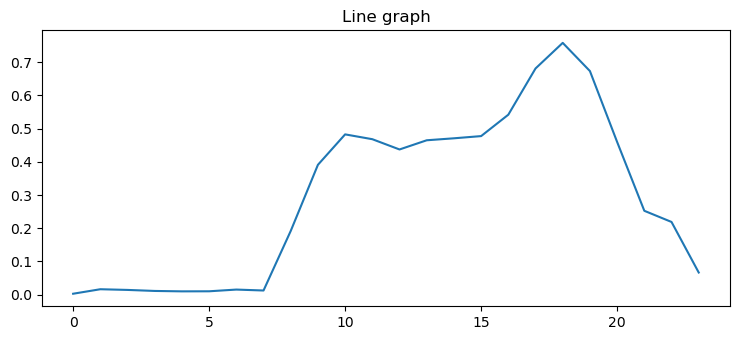

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = range(24)
y,fit,idx = ga_instance.best_solution()

plt.title("Line graph")
for y_ in np.array(y).reshape(N,24):
    plt.plot(x, y_)

plt.show()

In [ ]:
ga_instance.save('ga_1sig_ng100_npm10_spp50_categ0_10000')

TRANSFORMERS
DTW VS TRANSFORMERS TIME SERIES
MÉTRICAS (f1-score)

OVERLEAF

ESTUDO (RELATÓRIO)
- CLASSIFICADORES (NOVAS TÉCNICAS)
- DEEP LEARNING (SUMARIZAÇÃO)
- OUTRAS TÉCNICAS (SUMARIZAÇÃO / LEVANTAMENTO)
- TESTES-PILOTO 
- USO DAS ASSINATURAS (parâmetros dos classificadores (talvez))

- aplicar em outros datasets

In [ ]:
#teste
import numpy as np

# Define input signal and kernel
signal = np.array([0, 0, 1, 2, 3, 4, 5, 0, 0])
kernel = np.array([0, 0.5, 1, 1.5, 0])

# Perform 1D convolution
result = np.correlate(signal, kernel, mode='valid')

print("Convolution result:", result)
result.max()


13.0

In [ ]:
#teste
two_d = np.array([
    [1,2],
    [3,4]
])

np.mean([np.correlate(
    np.array([1,2,3,4]),
    row
).max() for row in two_d])

18.0

## Reunião 16/02

*verificar se é bom ou não o uso de algoritmos genéticos

*comparar com a geração simples de signature pela média do dataframe

*ver os transformers

*ver se tem mais classificadores interessantes

*M2 do Leonardo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_filtrado = df[(df['country'] == 0) & (df['city'] == 0) & (df['category'] == 1)]
df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])

column_means = np.mean(df_teste, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), column_means)

plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('Mean of p=0 c=0 cat=0')

plt.show()

In [ ]:
def extract_avg(country, city, cat):
    df_filtrado = df[(df['country'] == country) & (df['city'] == city) & (df['category'] == cat)]
    df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])
    column_means = np.mean(df_teste, axis=0)
    return column_means

In [ ]:
X_test_new = np.array([
    extract_avg(0,0,0),
    extract_avg(0,0,1),
    extract_avg(0,0,2),
    extract_avg(0,0,3),
    extract_avg(0,0,4)
    ])

In [ ]:
X_test_tensor_new = torch.tensor(np.expand_dims(X_test_new, axis=1), dtype=torch.float32)
X_test_tensor_new.shape

torch.Size([5, 1, 24])

In [ ]:
y_test_new = [0,1,2,3,4]

## New Hydra

In [ ]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

X_test_transform_new = transform(X_test_tensor_new)

X_test_transform_new = scaler.transform(X_test_transform_new)

hydra_pred_new = hydra_classifier.predict(X_test_transform_new)

print(accuracy_score(y_test_new, hydra_pred_new))
print(f1_score(y_test_new, hydra_pred_new, average='weighted'))

0.8
0.7333333333333333
